<a href="https://colab.research.google.com/github/madhavip427/NIDS/blob/main/code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Network Intrusion Detection using Optimized Machine LearningAlgorithms**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
import pandas as pnd #for dataframe
import numpy as nmp #for matrix computations
import matplotlib.pyplot as palt  #data visualization library
import seaborn as sbs #aliasing seaborn as sbs
import plotly.express as px
from sklearn.preprocessing import Normalizer #importing normalizers
from sklearn.decomposition import PCA #importing p_c_a for feature selection
from sklearn.model_selection import cross_val_score #used for cross_validating the model
from sklearn.metrics import classification_report # classification report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier #feature selection technique
# Importing the library
import psutil

import os
%matplotlib inline


Reading Data Set

In [ ]:
trn_dt = pnd.read_csv('/content/drive/MyDrive/code/kdd_train.csv')
tst_uk_dt = pnd.read_csv('/content/drive/MyDrive/code/kdd_test.csv')
tst_k_data = pnd.read_csv('/content/drive/MyDrive/code/KDDTrain+_20Percent.csv')

In [1]:
trn_dt.head()

NameError: ignored

In [ ]:
tst_uk_dt.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


In [ ]:
tst_k_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Data Preprocessing

In [ ]:
print(" training data's shape ",trn_dt.shape)
print(" known test data's shape ",tst_k_data.shape)
print(" unknown test data's shape ",tst_uk_dt.shape)

 training data's shape  (125973, 42)
 known test data's shape  (25192, 42)
 unknown test data's shape  (22544, 42)


In [ ]:
trn_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
trn_dt.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
trn_dt.dropna(inplace=True)
tst_k_data.dropna(inplace=True)
tst_uk_dt.dropna(inplace=True)

Text(0.5, 1.0, 'Distribution of Attack in Train Data')

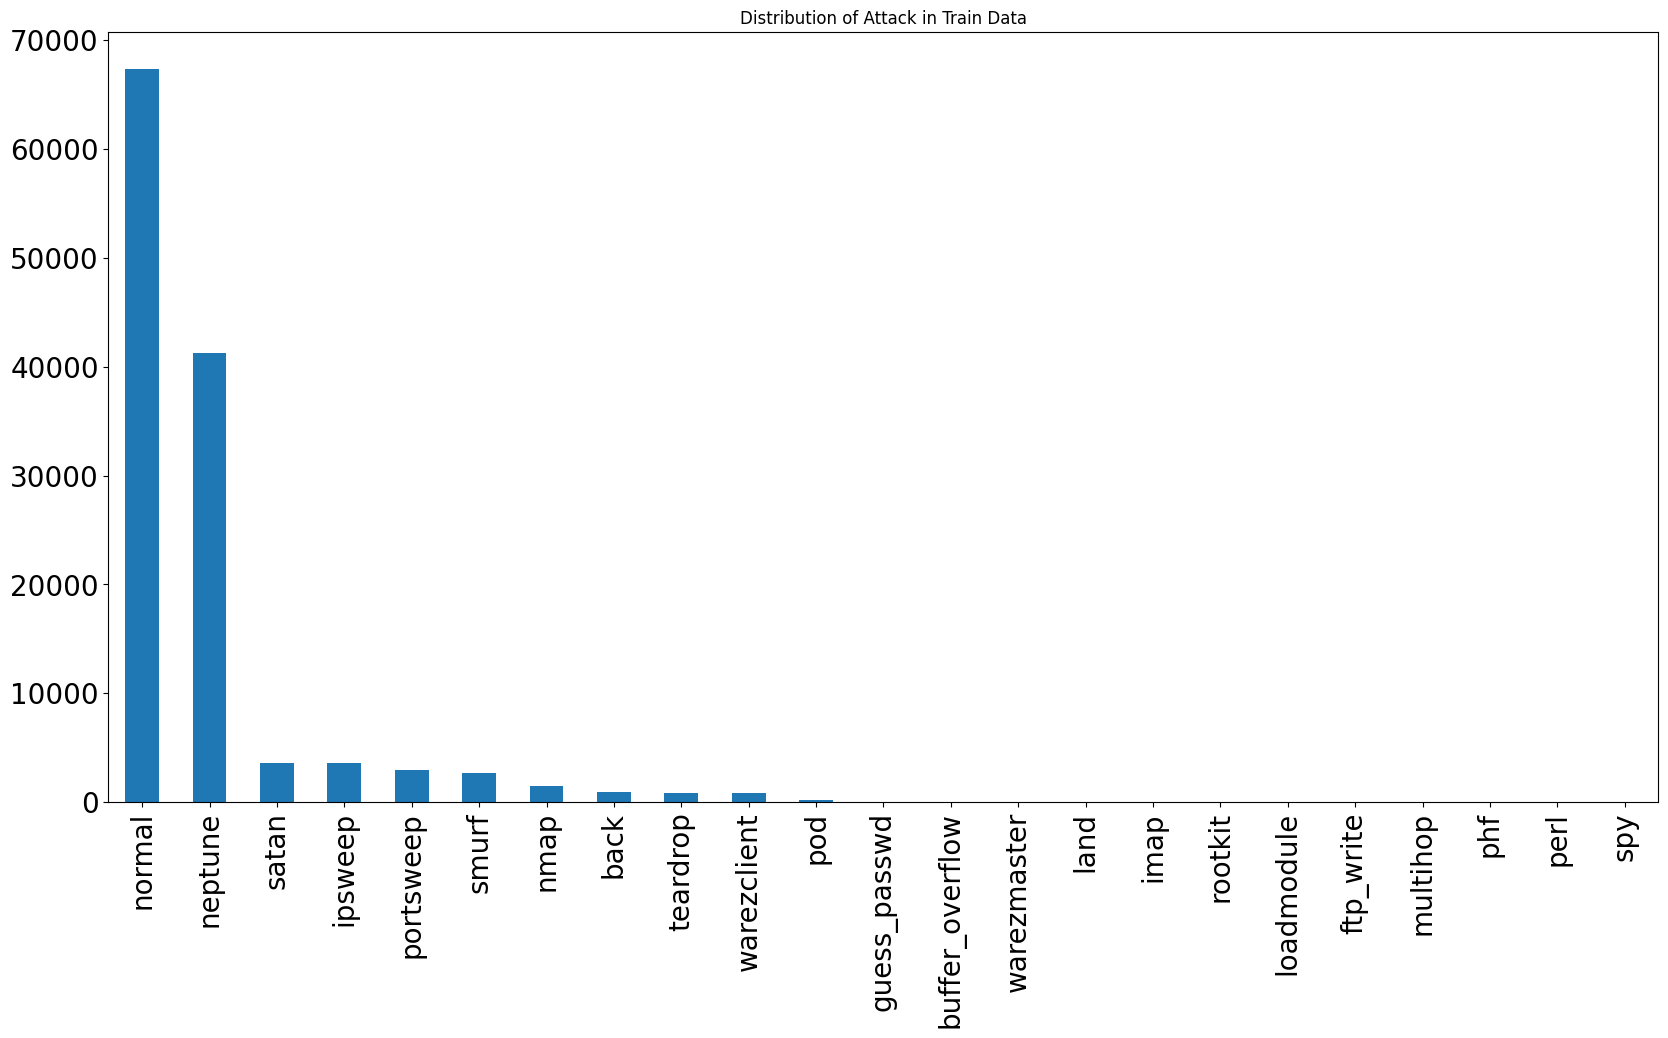

In [ ]:
# plot type of attacks
trn_dt['labels'].value_counts().plot(kind= 'bar', figsize= (20, 10), fontsize= 20);
palt.title('Distribution of Attack in Train Data')

Text(0.5, 1.0, 'Distribution of Attack in Known Test Data')

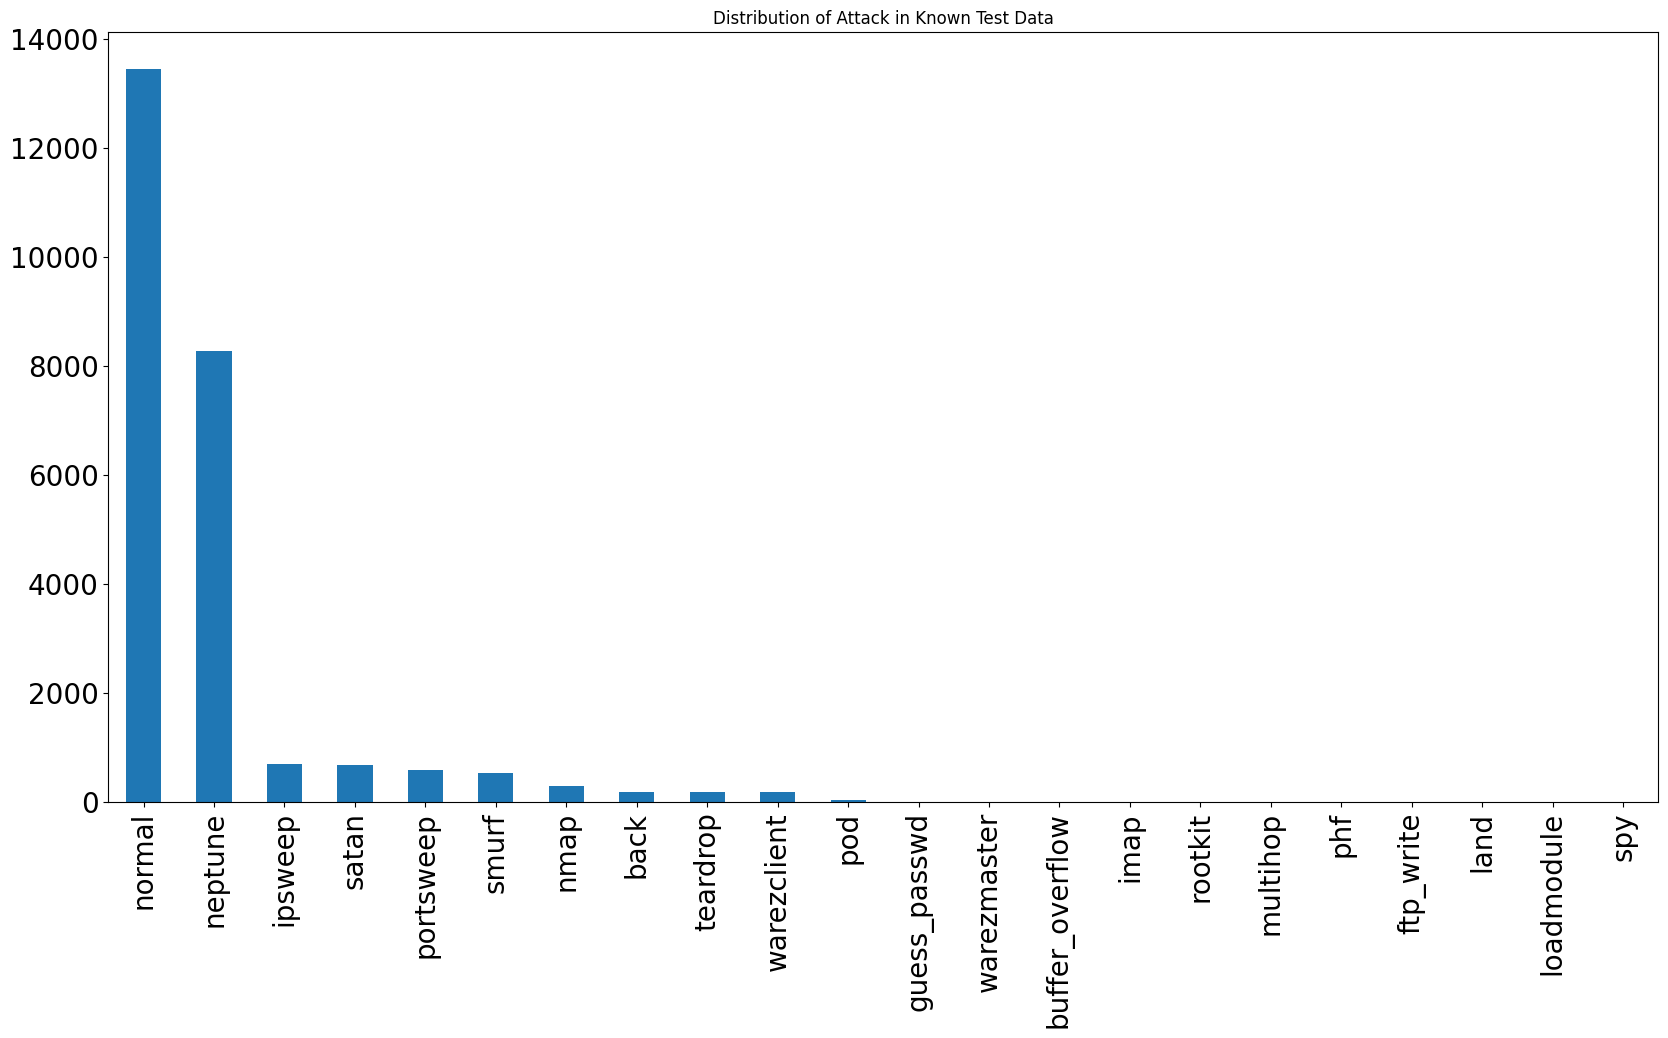

In [ ]:
# plot type of attacks
tst_k_data['labels'].value_counts().plot(kind= 'bar', figsize= (20, 10), fontsize= 20);
palt.title('Distribution of Attack in Known Test Data')

Text(0.5, 1.0, 'Distribution of Attack in Unknown Test Data')

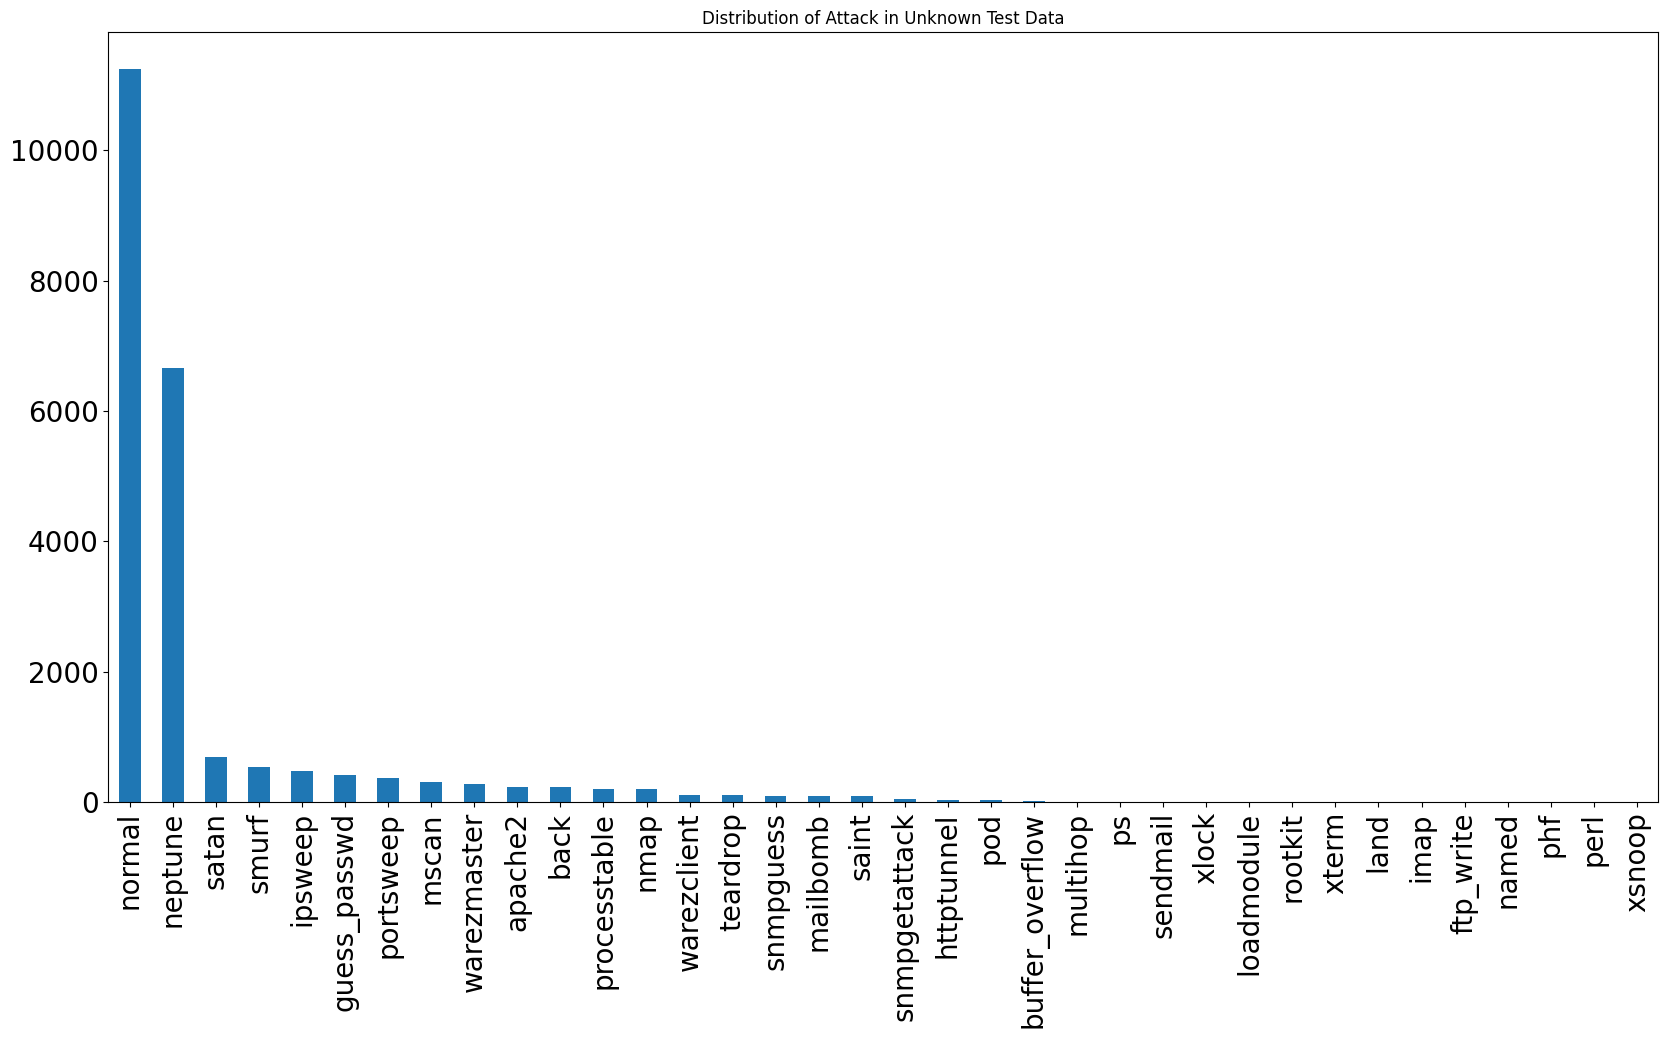

In [ ]:
# plot type of attacks
tst_uk_dt['labels'].value_counts().plot(kind= 'bar', figsize= (20, 10), fontsize= 20);
palt.title('Distribution of Attack in Unknown Test Data')

In [ ]:
#changing arguments of label data to required data
trn_lbl_df = trn_dt['labels']
tst_uk_lbl_df = tst_uk_dt['labels']
tst_k_lbl_df = tst_k_data['labels']

In [ ]:
trn_lbl_df = trn_lbl_df.replace({'normal' : 'normal', 'neptune' : 'dos' ,'back': 'dos', 'land': 'dos', 'pod': 'dos','smurf': 'dos','teardrop': 'dos','mailbomb': 'dos', 'apache2': 'dos', 'processtable': 'dos', 'udpstorm': 'dos', 'worm': 'dos',  'ipsweep' : 'probe','nmap' : 'probe','portsweep' : 'probe','satan' :'probe',  'mscan' :'probe','saint' :'probe','ftp_write': 'r2l','guess_passwd': 'r2l',  'imap': 'r2l','multihop': 'r2l','phf' : 'r2l', 'spy': 'r2l','warezclient': 'r2l','warezmaster': 'r2l','sendmail': 'r2l','named': 'r2l', 'snmpgetattack': 'r2l','snmpguess': 'r2l','xlock': 'r2l','xsnoop': 'r2l','httptunnel': 'r2l',  'buffer_overflow': 'u2r','loadmodule': 'u2r','perl': 'u2r','rootkit': 'u2r','ps': 'u2r',  'sqlattack': 'u2r','xterm': 'u2r'})

In [ ]:
tst_uk_lbl_df = tst_uk_lbl_df.replace({'normal' : 'normal', 'neptune' : 'dos', 'back' : 'dos', 'land' : 'dos', 'pod' : 'dos', 'smurf' : 'dos', 'teardrop' : 'dos', 'mailbomb' : 'dos', 'apache2' : 'dos',  'processtable' : 'dos', 'udpstorm' : 'dos', 'worm' : 'dos', 'ipsweep' : 'probe', 'nmap' : 'probe', 'portsweep' : 'probe', 'satan' : 'probe', 'mscan' : 'probe', 'saint' : 'probe', 'ftp_write' : 'r2l', 'guess_passwd' : 'r2l', 'imap' : 'r2l', 'multihop' : 'r2l', 'phf' : 'r2l', 'spy' : 'r2l', 'warezclient' : 'r2l', 'warezmaster' : 'r2l', 'sendmail' : 'r2l', 'named' : 'r2l', 'snmpgetattack' : 'r2l','snmpguess' : 'r2l', 'xlock' : 'r2l', 'xsnoop' : 'r2l', 'httptunnel' : 'r2l', 'buffer_overflow' : 'u2r', 'loadmodule' : 'u2r', 'perl' : 'u2r', 'rootkit' :  'u2r', 'ps' : 'u2r', 'sqlattack' : 'u2r', 'xterm' : 'u2r'})

tst_k_lbl_df = tst_k_lbl_df.replace({'normal' : 'normal', 'neptune' : 'dos', 'back' : 'dos', 'land' : 'dos', 'pod' : 'dos', 'smurf' : 'dos', 'teardrop' : 'dos', 'mailbomb' : 'dos', 'apache2' : 'dos',  'processtable' : 'dos', 'udpstorm' : 'dos', 'worm' : 'dos', 'ipsweep' : 'probe','nmap' : 'probe', 'portsweep' : 'probe', 'satan' : 'probe', 'mscan' : 'probe','saint' : 'probe', 'ftp_write' : 'r2l', 'guess_passwd' : 'r2l', 'imap' : 'r2l',  'multihop' : 'r2l', 'phf' : 'r2l', 'spy' : 'r2l', 'warezclient' : 'r2l','warezmaster' : 'r2l', 'sendmail' : 'r2l', 'named' : 'r2l', 'snmpgetattack' : 'r2l', 'snmpguess' : 'r2l', 'xlock' : 'r2l', 'xsnoop' : 'r2l', 'httptunnel' : 'r2l',   'buffer_overflow' : 'u2r', 'loadmodule' : 'u2r', 'perl' : 'u2r', 'rootkit' :  'u2r',   'ps' : 'u2r', 'sqlattack' : 'u2r', 'xterm' : 'u2r'})

In [ ]:
trn_dt['labels'] = trn_lbl_df
tst_uk_dt['labels'] = tst_uk_lbl_df
tst_k_data['labels'] = tst_k_lbl_df

In [ ]:
trn_dt['labels'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [ ]:
print("Training Data : ")
print("="*35)
print(trn_dt['labels'].value_counts().sort_values(ascending=False))
print("\n\nTesting Unknown Data : ")
print("="*35)
print(tst_uk_dt['labels'].value_counts().sort_values(ascending=False))
print("\n\nTesting Known Data : ")
print("="*35)
print(tst_k_data['labels'].value_counts().sort_values(ascending=False))

Training Data : 
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: labels, dtype: int64


Testing Unknown Data : 
normal    11245
dos        8095
probe      2157
r2l        1009
u2r          38
Name: labels, dtype: int64


Testing Known Data : 
normal    13449
dos        9234
probe      2289
r2l         209
u2r          11
Name: labels, dtype: int64


In [ ]:
#changing object types to numeric data type
trn_dt.replace(to_replace=['tcp', 'udp', 'icmp'],value=[1,2,3],inplace=True)
tst_uk_dt.replace(to_replace=['tcp', 'udp', 'icmp'],value=[1,2,3],inplace=True)
tst_k_data.replace(to_replace=['tcp', 'udp', 'icmp'],value=[1,2,3],inplace=True)

trn_dt.replace(to_replace=['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3','S2','OTH'],value=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)
tst_uk_dt.replace(to_replace=['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3','S2','OTH'],value=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)
tst_k_data.replace(to_replace=['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3','S2','OTH'],value=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)

trn_dt.replace(to_replace=['ftp_data', 'other', 'private', 'http', 'remote_job', 'name','netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u','supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp','netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap','ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois','imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login','kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u','discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell','netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i','pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i','http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'],
        value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
              31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
              61,62,63,64,65,66,67,68,69,70],inplace=True)
tst_uk_dt.replace(to_replace=['ftp_data', 'other', 'private', 'http', 'remote_job', 'name','netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u','supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp','netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap','ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois','imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login','kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u','discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell','netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i','pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i','http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'],
        value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
              31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
              61,62,63,64,65,66,67,68,69,70],inplace=True)

tst_k_data.replace(to_replace=['ftp_data', 'other', 'private', 'http', 'remote_job', 'name','netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u','supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp','netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap','ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois','imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login','kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u','discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell','netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i','pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i','http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'],
        value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
              31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
              61,62,63,64,65,66,67,68,69,70],inplace=True)

In [ ]:
trn_dt.replace(to_replace=['normal','dos','probe','r2l','u2r'],value=[0,1,2,3,4],inplace=True)
tst_uk_dt.replace(to_replace=['normal','dos','probe','r2l','u2r'],value=[0,1,2,3,4],inplace=True)
tst_k_data.replace(to_replace=['normal','dos','probe','r2l','u2r'],value=[0,1,2,3,4],inplace=True)
trn_dt["labels"].unique()

array([0, 1, 3, 2, 4])

In [ ]:
# initialize data of lists.
val_count = trn_dt['labels'].value_counts().sort_values(ascending=False) #value counts in sorted order of labels column
data = [val_count[0], val_count[1], val_count[2], val_count[3], val_count[4]] # storing image count

tgt = ['normal', 'dos', 'probe', 'r2l', 'u2r'] # defining target labels
c_data = {'Category': tgt,
        'Count':data}

# Create DataFrame
at_df = pnd.DataFrame(c_data)
fig = px.pie(at_df, values='Count', names='Category', title='Training Attack Category')
fig.show()

In [ ]:
# initialize data of lists.
v_c1 = tst_k_data['labels'].value_counts().sort_values(ascending=False) #value counts in sorted order of labels column of training set
data = [v_c1[0], v_c1[1], v_c1[2], v_c1[3], v_c1[4]] # storing image count

tgt = ['normal', 'dos', 'probe', 'r2l', 'u2r'] # define target labels
c_data = {'Category': tgt,
        'Count':data}

# Create DataFrame
at_df = pnd.DataFrame(c_data)
fig = px.pie(at_df, values='Count', names='Category', title='Test Known Attack Category')
fig.show()

In [ ]:
# initialize data of lists.
v_c2 = tst_uk_dt['labels'].value_counts().sort_values(ascending=False) #value counts in sorted order of labels column of unknown test data
data = [v_c2[0], v_c2[1], v_c2[2], v_c2[3], v_c2[4]] # storing image count

tgt = ['normal', 'dos', 'probe', 'r2l', 'u2r'] # define target labels
c_data = {'Category': tgt,
        'Count':data}

# Create DataFrame
at_df = pnd.DataFrame(c_data)
fig = px.pie(at_df, values='Count', names='Category', title='Test Unknown Attack Category')
fig.show()

Splitting the data

In [ ]:
X_tr_data = trn_dt.iloc[:,0:41]
y_tr_data = trn_dt.iloc[:,41]

X_ts_ukn_data = tst_uk_dt.iloc[:,0:41]
y_ts_ukn_data = tst_uk_dt.iloc[:,41]

X_ts_kn_data = tst_k_data.iloc[:,0:41]
y_ts_kn_data = tst_k_data.iloc[:,41]

In [ ]:
scaler = Normalizer() #object creation
scaler.fit(X_tr_data) #model fitting
scaled_train_data=scaler.transform(X_tr_data)  #transforming data
scaled_test_known_data=scaler.transform(X_ts_kn_data)
scaled_test_unknown_data=scaler.transform(X_ts_ukn_data)
scaler

Normalizer()

In [ ]:
scaled_train_data

array([[0.00000000e+00, 1.94544407e-03, 1.94544407e-03, ...,
        0.00000000e+00, 9.72722034e-05, 0.00000000e+00],
       [0.00000000e+00, 6.79933299e-03, 6.79933299e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.51616006e-03, 1.05484802e-02, ...,
        3.51616006e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 4.38908807e-04, 7.02254092e-03, ...,
        0.00000000e+00, 4.38908807e-06, 0.00000000e+00],
       [0.00000000e+00, 3.38654363e-03, 1.21915571e-01, ...,
        3.38654363e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.26577417e-03, 3.26577417e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
p_c_a = PCA(n_components = 28) #principal component analysis object creation
p_c_a.fit(scaled_train_data) #fitting

PCA(n_components=28)

In [ ]:
x_train_pca = p_c_a.transform(scaled_train_data) #transforming
x_test_unknown_pca = p_c_a.transform(scaled_test_unknown_data)#transforming
x_test_known_pca = p_c_a.transform(scaled_test_known_data)#transforming


In [ ]:
print(x_train_pca.shape)  # data set after performing pca on known data set
print(x_test_known_pca.shape) # data set after performing pca on known data set
print(x_test_unknown_pca.shape) # data set after performing pca on unknown data set

(125973, 28)
(25192, 28)
(22544, 28)


In [ ]:
def show_confusion_matrix(y_tst,y_prd,tt):
    # A function that draws the confusion matrix of the model and the data
    cm_matrix = confusion_matrix(y_tst,y_prd)
    # Creating a dataframe so it will be easy for plotting.
    cm = pnd.DataFrame(cm_matrix,
                     index = ['Normal','Dos','Probe','R2l','U2r'],
                     columns = ['Normal','Dos','Probe','R2l','U2r'])
    #Plotting the confusion matrix
    palt.figure(figsize=(10,6))
    sbs.heatmap(cm,cmap=palt.cm.Blues, annot=True,fmt='d')
    palt.title(tt)
    palt.ylabel('Actal Values')
    palt.xlabel('Predicted Values')
    palt.show()
    return cm_matrix                                                                                                         # Prediction with the help of the model


In [ ]:
#detection rate calculation
def det_rate_calc(c_m):
    F_P = c_m.sum(axis=0) - nmp.diag(c_m)
    F_N = c_m.sum(axis=1) - nmp.diag(c_m)
    T_P = nmp.diag(c_m)
    T_N = c_m.sum() - (F_P + F_N + T_P)

    # Sensitivity, hit rate, detection rate, or true positive rate
    drate = T_P/(T_P+F_N)
    drate=drate.mean()
    return drate

Applying ExtraTree Classifier

Accuracy after performing ETC (train data) 0.9983806065014866
Classification Report for Train Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           1       1.00      1.00      1.00     45927
           2       1.00      1.00      1.00     11656
           3       1.00      1.00      1.00       995
           4       1.00      0.98      0.99        52

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973



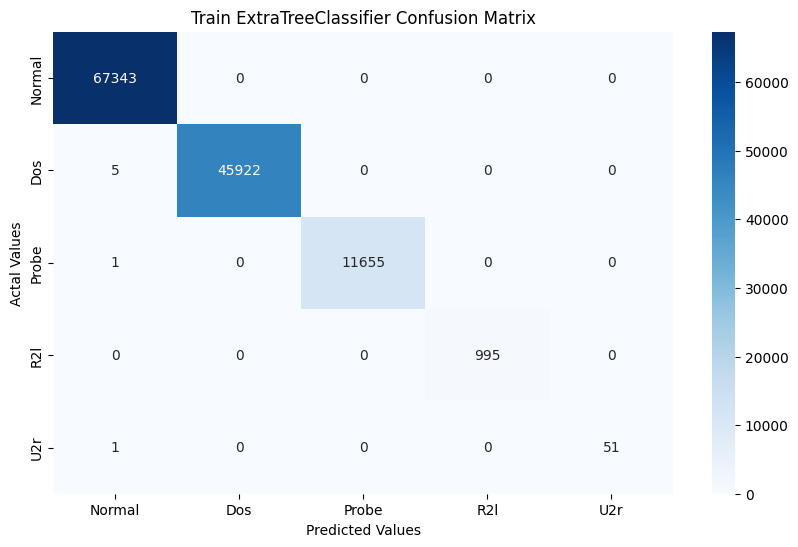

Detection Rate of ExtraTreeClassifier (Train Dataset) : 0.9961149139245655
CPU times: user 1min 7s, sys: 219 ms, total: 1min 7s
Wall time: 1min 7s


In [ ]:
%%time
etcl=ExtraTreesClassifier(max_depth=35, n_estimators=100, random_state=60)
etcl.fit(x_train_pca,y_tr_data)

tr_scores1 = cross_val_score(etcl, x_train_pca,y_tr_data, cv=5).mean()
print("Accuracy after performing ETC (train data)",tr_scores1)

# train known attacks
y_forecast_tr_etc = etcl.predict(x_train_pca)
print("Classification Report for Train Dataset")
print(classification_report(y_tr_data,y_forecast_tr_etc,labels=[0,1,2,3,4]))
tr_matrix1 = show_confusion_matrix(y_tr_data,y_forecast_tr_etc,'Train ExtraTreeClassifier Confusion Matrix')
print('Detection Rate of ExtraTreeClassifier (Train Dataset) :',det_rate_calc(tr_matrix1))

Accuracy after performing ETC (test known data) 0.9964670725152072
Classification Report for Known Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13449
           1       1.00      1.00      1.00      9234
           2       1.00      1.00      1.00      2289
           3       1.00      1.00      1.00       209
           4       1.00      1.00      1.00        11

    accuracy                           1.00     25192
   macro avg       1.00      1.00      1.00     25192
weighted avg       1.00      1.00      1.00     25192



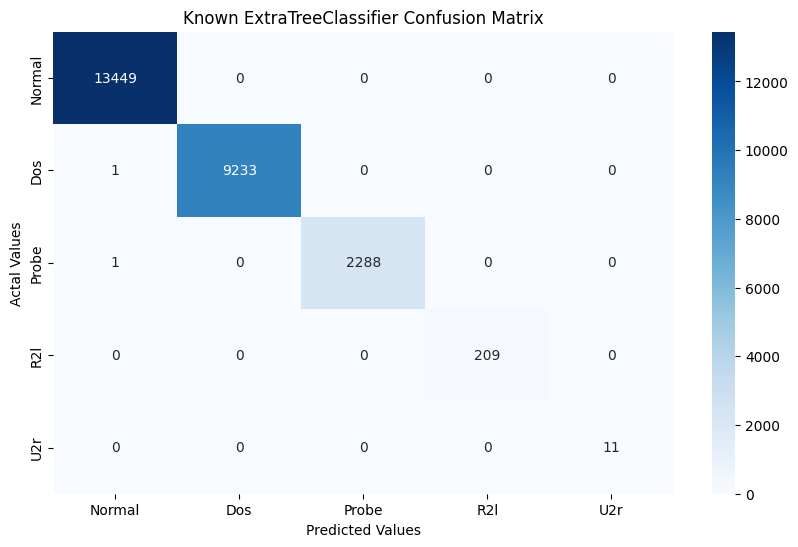

Detection Rate of ETC (Known Test Dataset) : 0.9998909665147124
CPU times: user 11.8 s, sys: 105 ms, total: 12 s
Wall time: 12.4 s


In [ ]:
%%time
ts_kn_scores1 = cross_val_score(etcl, x_test_known_pca,y_ts_kn_data, cv=5).mean()
print("Accuracy after performing ETC (test known data)",ts_kn_scores1)

# test known attacks
y_forecast_kn_etc = etcl.predict(x_test_known_pca)
print("Classification Report for Known Test Dataset")
print(classification_report(y_ts_kn_data,y_forecast_kn_etc,labels=[0,1,2,3,4]))
kn_matrix1 = show_confusion_matrix(y_ts_kn_data,y_forecast_kn_etc,'Known ExtraTreeClassifier Confusion Matrix')
print('Detection Rate of ETC (Known Test Dataset) :',det_rate_calc(kn_matrix1))


Accuracy after performing ETC (test unknown data) 0.9869145176077895

Classification Report for Unknown Test Dataset
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     11245
           1       0.99      0.93      0.96      8095
           2       0.94      0.87      0.90      2157
           3       0.99      0.18      0.30      1009
           4       1.00      0.34      0.51        38

    accuracy                           0.92     22544
   macro avg       0.96      0.66      0.72     22544
weighted avg       0.93      0.92      0.91     22544




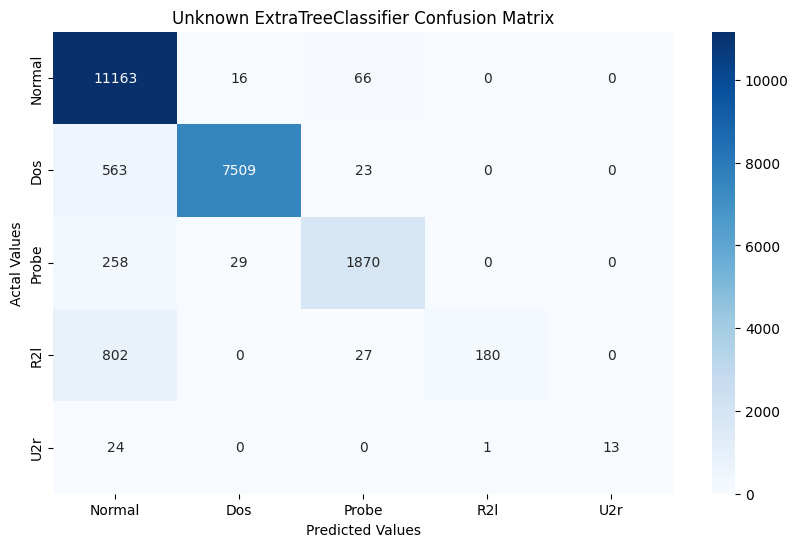


Detection Rate of ExtraTreeClassifier (Unknown Test Dataset) : 0.6615524099267742
CPU times: user 9.6 s, sys: 119 ms, total: 9.72 s
Wall time: 9.73 s


In [ ]:
%%time
ts_ukn_scores1 = cross_val_score(etcl, x_test_unknown_pca,y_ts_ukn_data, cv=5).mean()
print("Accuracy after performing ETC (test unknown data)",ts_ukn_scores1)
print()
# test unknown attacks
y_forecast_ukn_etc = etcl.predict(x_test_unknown_pca)
print("Classification Report for Unknown Test Dataset")
print(classification_report(y_ts_ukn_data,y_forecast_ukn_etc,labels=[0,1,2,3,4]))
print()
ukn_matrix1 = show_confusion_matrix(y_ts_ukn_data,y_forecast_ukn_etc,'Unknown ExtraTreeClassifier Confusion Matrix')

#detection rate
print()
print('Detection Rate of ExtraTreeClassifier (Unknown Test Dataset) :',det_rate_calc(ukn_matrix1))

In [ ]:
print('The memory (RAM) usage by the program in GB:', psutil.virtual_memory()[3]/(1024**3)) #printing memory (RAM) usage in GB:
print("CPU percentage usage is : ",(psutil.cpu_percent()/psutil.cpu_count())) #cpu percentage usage

The memory (RAM) usage by the program in GB: 1.5675430297851562
CPU percentage usage is :  14.15
